# Word Embeddings Example

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

# define class labels
labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [3]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[25, 48], [18, 22], [39, 3], [17, 22], [28], [37], [3, 3], [40, 18], [3, 22], [40, 19, 48, 4]]


In [4]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[25 48  0  0]
 [18 22  0  0]
 [39  3  0  0]
 [17 22  0  0]
 [28  0  0  0]
 [37  0  0  0]
 [ 3  3  0  0]
 [40 18  0  0]
 [ 3 22  0  0]
 [40 19 48  4]]


In [5]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f, Loss: %f' % (accuracy * 100, loss * 100))

Accuracy: 89.999998, Loss: 60.698557


In [7]:
def get_embeddings(model):

    # Embedding Layer
    embedding_layer = model.layers[0]
    embeddings = embedding_layer.get_weights()[0]
    print 'Embedding Layer shape:', embeddings.shape
    
    return embeddings

In [8]:
embeddings = get_embeddings(model)

Embedding Layer shape: (50, 8)


In [9]:
embeddings[0]

array([ 0.02553662, -0.07958973, -0.02820751, -0.09737846,  0.0166669 ,
        0.04846452,  0.08318833, -0.00592535], dtype=float32)

In [10]:
from sklearn.decomposition import PCA

def get_pca(embeddings):

    # PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(embeddings)
    print 'PCA explained variance ratio:', pca.explained_variance_ratio_, 'Total:', sum(pca.explained_variance_ratio_)
    return principal_components

In [11]:
pca = get_pca(embeddings)

PCA explained variance ratio: [ 0.38159484  0.15619205] Total: 0.537786886096


In [12]:
from keras.preprocessing.text import text_to_word_sequence

# create dictionary
id_to_word = {}
i = 0
while i < len(encoded_docs):
    encoded_doc = encoded_docs[i]
    words = text_to_word_sequence(docs[i])
    j = 0
    while j < len(encoded_doc):
        index = encoded_doc[j]
        word = words[j]
        if index not in id_to_word:
            id_to_word[index] = word
        j += 1
    i += 1

In [13]:
id_to_word

{3: 'effort',
 4: 'better',
 17: 'nice',
 18: 'good',
 19: 'have',
 22: 'work',
 25: 'well',
 28: 'excellent',
 37: 'weak',
 39: 'great',
 40: 'not',
 48: 'done'}

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_dimensionality_reduction(low_dim_embs, figsize=(8, 8)):

    plt.figure(figsize=figsize, dpi=100)
    i = 0
    while i < len(low_dim_embs):

        if i in id_to_word:
            x, y = low_dim_embs[i, :]
            word = id_to_word[i]

            plt.scatter(x, y, color='b')
            plt.annotate(word,
                        xy=(x, y),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom',
                        fontsize=14)
        
        i += 1

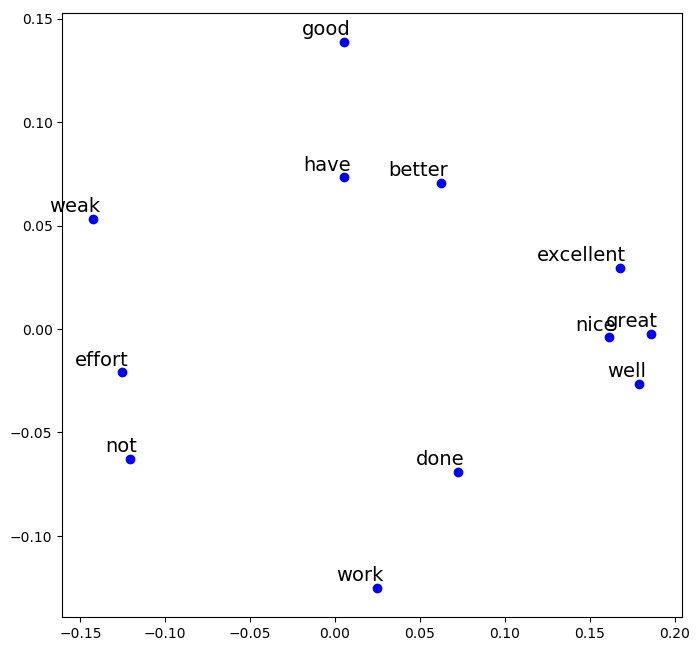

In [16]:
plot_dimensionality_reduction(pca)